<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/C13_Parallelizing_Neural_Network_Training_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
a= np.array([1,2,3], dtype=np.int32)
b= [4,5,6]
t_a= tf.convert_to_tensor(a)
t_b= tf.convert_to_tensor(b)
t_a

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [2]:
t_ones= tf.ones((2,3))
t_ones.shape

TensorShape([2, 3])

In [3]:
t_ones.numpy()

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

# Manipulating the data type and shape of tensor

In [4]:
t_a_new = tf.cast(t_a, tf.int64)
t_a_new.dtype

tf.int64

In [6]:
# transposing a tensor
t= tf.random.uniform(shape=(3,5))
t_tr=tf.transpose(t)
t_tr.shape

TensorShape([5, 3])

In [8]:
#reshape tensor
t= tf.zeros((30,))
t_reshape= tf.reshape(t, shape=(5,6))
t_reshape.shape

TensorShape([5, 6])

In [10]:
# remove unnecessary dimensions
t= tf.zeros((1,2,1,4,1))
t_sqz= tf.squeeze(t, axis=(2,4))
t_sqz.shape

TensorShape([1, 2, 4])

# apply mathematical operations to tensors

In [11]:
tf.random.set_seed(1)
t1= tf.random.uniform(shape=(5,2), minval=-1.0, maxval=1.0)
t2= tf.random.normal(shape=(5,2), mean=0.0, stddev=1.0)
t3= tf.multiply(t1,t2).numpy
t3

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-0.26996338, -0.87363994],
       [-0.01652772, -0.17496566],
       [-0.296179  , -0.13944866],
       [-0.7272108 ,  0.13463594],
       [-0.40087393,  0.00445268]], dtype=float32)>>

In [12]:
t4= tf.math.reduce_mean(t1, axis=0)
t4

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.08957257, 0.2074099 ], dtype=float32)>

In [14]:
t5= tf.linalg.matmul(t1,t2, transpose_b=True)
t5.numpy()

array([[-1.1436033 ,  1.1154624 , -0.8695717 , -0.3210435 ,  0.8555103 ],
       [ 0.2480186 , -0.19149339,  0.2504958 , -0.0644026 , -0.3307204 ],
       [-0.47782415,  0.40717956, -0.43562764,  0.02238911,  0.5270062 ],
       [ 0.52479297, -0.23352614,  0.74080014, -0.5925749 , -1.1940588 ],
       [-0.09918742,  0.26019508,  0.12526006, -0.46231267, -0.39642125]],
      dtype=float32)

In [16]:
t6= tf.linalg.matmul(t1,t2, transpose_a=True)
t6.numpy()

array([[-1.7107549 ,  0.30218127],
       [ 0.37133017, -1.0489656 ]], dtype=float32)

In [17]:
norm_t1= tf.norm(t1, ord=2, axis=1).numpy()
norm_t1

array([1.045609  , 0.29283747, 0.5043658 , 0.9603831 , 0.38280934],
      dtype=float32)

# Split, stack and concatenate tensors

In [19]:
tf.random.set_seed(1)
t= tf.random.uniform((6,))
t.numpy()

array([0.16513085, 0.9014813 , 0.6309742 , 0.4345461 , 0.29193902,
       0.64250207], dtype=float32)

In [23]:
t_split= tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_split]

[array([0.16513085, 0.9014813 ], dtype=float32),
 array([0.6309742, 0.4345461], dtype=float32),
 array([0.29193902, 0.64250207], dtype=float32)]

In [24]:
# provide the sizes of different split
t_split= tf.split(t, num_or_size_splits=[4,2])
[item.numpy() for item in t_split]

[array([0.16513085, 0.9014813 , 0.6309742 , 0.4345461 ], dtype=float32),
 array([0.29193902, 0.64250207], dtype=float32)]

In [29]:
A= tf.ones((3,))
B= tf.zeros((2,))
C= tf.concat([A,B], axis=0)
C

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([1., 1., 1., 0., 0.], dtype=float32)>

In [32]:
A= tf.ones((3,))
B= tf.zeros((3,))
C= tf.stack([A,B], axis=1)
C

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)>

# Building input pipelines using tf.data - the Tensorflow Dataset API


In [39]:
# creating a tensor flow Dataset from existing tensors
a= [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds= tf.data.Dataset.from_tensor_slices(a)
ds

<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>

In [41]:
for item in ds:
  print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [42]:
ds_batch= ds.batch(3)
for i, elem in enumerate(ds_batch,1):
  print(i, elem)

1 tf.Tensor([1.2 3.4 7.5], shape=(3,), dtype=float32)
2 tf.Tensor([4.1 5.  1. ], shape=(3,), dtype=float32)


In [43]:
# combining two tensors into a joint dataset
t_x= tf.random.uniform([4,3], dtype=tf.float32)
t_y= tf.range(4)

In [44]:
t_x.numpy()

array([[0.51010704, 0.44353175, 0.4085331 ],
       [0.9924923 , 0.68866396, 0.34584963],
       [0.436067  , 0.601061  , 0.45662427],
       [0.75269794, 0.18799722, 0.54875696]], dtype=float32)

In [45]:
t_y.numpy()

array([0, 1, 2, 3], dtype=int32)

In [48]:
ds_x= tf.data.Dataset.from_tensor_slices(t_x)
ds_y= tf.data.Dataset.from_tensor_slices(t_y)
ds_joint= tf.data.Dataset.zip((ds_x,ds_y))
for x in ds_joint:
  print(x)

(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.51010704, 0.44353175, 0.4085331 ], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32, numpy=0>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.9924923 , 0.68866396, 0.34584963], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32, numpy=1>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.436067  , 0.601061  , 0.45662427], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32, numpy=2>)
(<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.75269794, 0.18799722, 0.54875696], dtype=float32)>, <tf.Tensor: shape=(), dtype=int32, numpy=3>)


In [51]:
ds_joint= tf.data.Dataset.from_tensor_slices((t_x,t_y))
for x in ds_joint:
  print(x[0].numpy(), x[1].numpy())

[0.51010704 0.44353175 0.4085331 ] 0
[0.9924923  0.68866396 0.34584963] 1
[0.436067   0.601061   0.45662427] 2
[0.75269794 0.18799722 0.54875696] 3


In [53]:
# apply transformation to each individual element of a dataset
ds_trans= ds_joint.map(lambda x,y: (x*2-1.0,y+1))
for x in ds_trans:
  print(x[0],x[1])

tf.Tensor([ 0.02021408 -0.1129365  -0.1829338 ], shape=(3,), dtype=float32) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([ 0.98498464  0.37732792 -0.30830073], shape=(3,), dtype=float32) tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor([-0.12786603  0.20212197 -0.08675146], shape=(3,), dtype=float32) tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([ 0.5053959  -0.62400556  0.09751391], shape=(3,), dtype=float32) tf.Tensor(4, shape=(), dtype=int32)


can be use for use define function. process image filename

# shuffle, batch and repeat

In [55]:
ds= ds_joint.shuffle(buffer_size=len(t_x))
# buffer size: how many elements in the dataset are grouped together before shuffling
for x in ds:
  print(x[0],x[1])

tf.Tensor([0.51010704 0.44353175 0.4085331 ], shape=(3,), dtype=float32) tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor([0.9924923  0.68866396 0.34584963], shape=(3,), dtype=float32) tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor([0.75269794 0.18799722 0.54875696], shape=(3,), dtype=float32) tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([0.436067   0.601061   0.45662427], shape=(3,), dtype=float32) tf.Tensor(2, shape=(), dtype=int32)


In [58]:
ds= ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y= next(iter(ds))
print(batch_x.numpy())
print(batch_y.numpy())

[[0.51010704 0.44353175 0.4085331 ]
 [0.9924923  0.68866396 0.34584963]
 [0.436067   0.601061   0.45662427]]
[0 1 2]


In [68]:
# in addition, when training a model for multiple epochs, we need to shuffle and iterate over the dataset by desired number of epochs.
ds= ds_joint.batch(3).repeat(count=2)
for i,(batch_x,batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [72]:
ds= ds_joint.repeat(count=2).batch(3)
for i,(batch_x,batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [84]:
# Order 1: shuffle -> batch -> repeat
tf.random.set_seed(1)
ds= ds_joint.shuffle(4).batch(2).repeat(3)
for i,(batch_x,batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [81]:
# Order 2: batch -> shuffle -> repeat
tf.random.set_seed(1)
ds= ds_joint.batch(2).shuffle(4).repeat(3)
for i,(batch_x,batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


# Creating a dataset from files on your local storage disk

In [2]:
# tf.io to read image file content
# tf.image to decode the raw content and image resizing
import pathlib
imgdir_path= pathlib.Path('cat_dog_images')
file_list=sorted([str(path) for path in imgdir_path.glob('*.jpeg')])
file_list

['cat_dog_images/cat-01.jpeg',
 'cat_dog_images/cat-02.jpeg',
 'cat_dog_images/cat-03.jpeg',
 'cat_dog_images/dog-01.jpeg',
 'cat_dog_images/dog-02.jpeg',
 'cat_dog_images/dog-03.jpeg']

cat_dog_images/cat-01.jpeg
(900, 1200, 3)
cat_dog_images/cat-02.jpeg
(900, 1200, 3)
cat_dog_images/cat-03.jpeg
(900, 742, 3)
cat_dog_images/dog-01.jpeg
(800, 1200, 3)
cat_dog_images/dog-02.jpeg
(800, 1200, 3)
cat_dog_images/dog-03.jpeg
(900, 1200, 3)


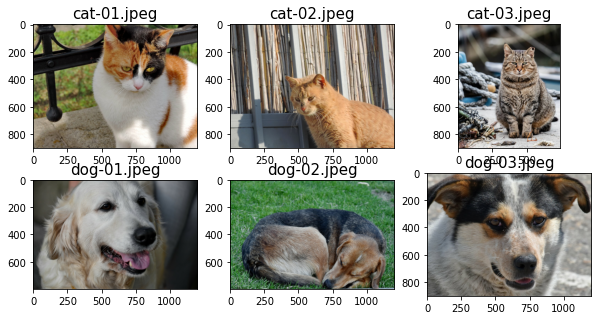

In [4]:
# visualize
import matplotlib.pyplot as plt
import os
import tensorflow as tf
fig= plt.figure(figsize=(10,5))
for i,file in enumerate(file_list):
  print(file)
  img_raw= tf.io.read_file(file)
  img= tf.image.decode_image(img_raw)
  print(img.shape)
  ax= fig.add_subplot(2,3,i+1)
  ax.imshow(img)
  ax.set_title(os.path.basename(file),size=15)

In [7]:
label=[1 if 'dog' in  os.path.basename(file)  else 0 for file in file_list]
label

[0, 0, 0, 1, 1, 1]

In [11]:
ds_files_label= tf.data.Dataset.from_tensor_slices((file_list,label))
for x in ds_files_label:
  print(x[0].numpy(),x[1].numpy())

b'cat_dog_images/cat-01.jpeg' 0
b'cat_dog_images/cat-02.jpeg' 0
b'cat_dog_images/cat-03.jpeg' 0
b'cat_dog_images/dog-01.jpeg' 1
b'cat_dog_images/dog-02.jpeg' 1
b'cat_dog_images/dog-03.jpeg' 1


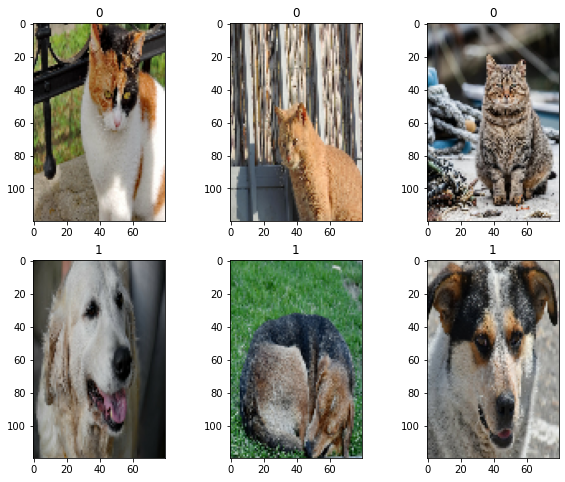

In [24]:
# we need to apply transformation into this dataset, load the image content from its file path, decode the raw content, resize image
img_height, img_width= 120,80
def load_and_preprocess(path, label):
  img_raw=tf.io.read_file(path)
  img= tf.image.decode_jpeg(img_raw, channels=3)
  img_reshape= tf.image.resize(img, [img_height, img_width])
  img_reshape/=255.0
  return img_reshape, label
ds_images_label= ds_files_label.map(load_and_preprocess)
fig=plt.figure(figsize=(10,8))
for x,y in enumerate(ds_images_label):
  ax= fig.add_subplot(2,3,x+1)
  ax.imshow(y[0])
  ax.set_title(y[1].numpy())

# Fetching available datasets from the tensorflow_datasets library

In [27]:
import tensorflow_datasets as tfds
len(tfds.list_builders())

1117

fetching dataset
1. Calling the dataset building function
2. Execute download_and_prepare() method
3. Calling as_dataset() method

In [79]:
celeba_bldr= tfds.builder('mnist')
celeba_bldr.info.features

FeaturesDict({
    'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
})

In [80]:
celeba_bldr.info.citation

'@article{lecun2010mnist,\n  title={MNIST handwritten digit database},\n  author={LeCun, Yann and Cortes, Corinna and Burges, CJ},\n  journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},\n  volume={2},\n  year={2010}\n}'

In [81]:
celeba_bldr.download_and_prepare()

In [82]:
dataset= celeba_bldr.as_dataset(shuffle_files=False)
dataset.keys()

dict_keys(['test', 'train'])

In [83]:
ds_train= dataset['train']
example= next(iter(ds_train))
type(example)

dict

In [84]:
ds_train= ds_train.map(lambda item: (item['image'], item['label']))
ds_train= ds_train.batch(18)
images, label= next(iter(ds_train))
print(images.shape, label)

(18, 28, 28, 1) tf.Tensor([4 1 0 7 8 1 2 7 1 6 6 4 7 7 3 3 7 9], shape=(18,), dtype=int64)


Second approach


In [86]:
mnist, mnist_info=  tfds.load(name='mnist', with_info= True, shuffle_files=False)
mnist_info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='~/tensorflow_datasets/mnist/3.0.1',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
)

apply transformation to convert the element from a dictionary into tuple

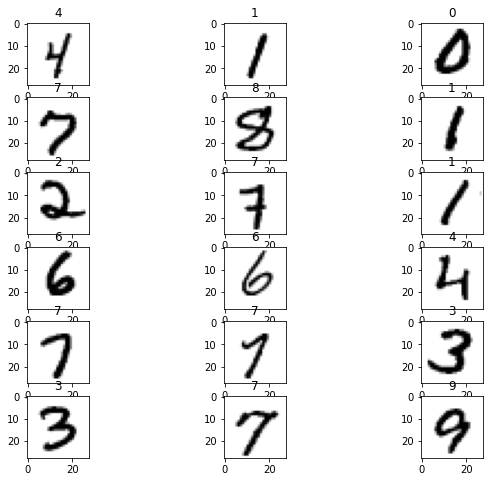

In [93]:
ds_train= mnist['train']
ds_train= ds_train.map(lambda item: (item['image'], item['label']))
ds_train= ds_train.batch(18)
batch= next(iter(ds_train))
fig= plt.figure(figsize=(10,8))
for i,(image,label) in enumerate(zip(batch[0],batch[1])):
  ax=fig.add_subplot(6,3,i+1)
  ax.imshow(image[:,:,0], cmap='gray_r')
  ax.set_title(label.numpy())



# The Tensorflow Keras API (tf.keras)

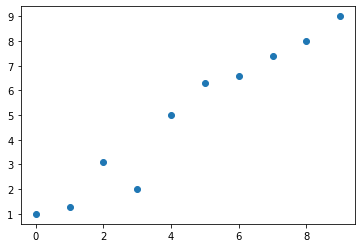

In [96]:
import numpy as np
X_train= np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])
plt.plot(X_train, y_train, 'o')

In [97]:
X_train_norm= (X_train - np.mean(X_train))/ np.std(X_train)
ds_train_orig= tf.data.Dataset.from_tensor_slices((tf.cast(X_train_norm, tf.float32), tf.cast(y_train,tf.float32)))

In [100]:
# we will define a model derived from tf.Keras.Model class
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w= tf.Variable(0.0, name= 'weight')
    self.b= tf.Variable(0.0, name= 'bias')
  def call(self, x):
    return self.w*x+self.b
model= MyModel()
model.build(input_shape= (None,1))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Note that we use None as the placeholder for the fisrt dimension of the expected input tensor via model.build, which allow us to use an arbitrary batch size

In [109]:
def loss_fn(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true-y_pred))
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss= loss_fn(outputs,model(inputs))
  dW, db= tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate* dW)
  model.b.assign_sub(learning_rate* db)

In [112]:
tf.random.set_seed(1)
num_epochs= 200
log_steps=100
learning_rate= 0.001
batch_size= 1
steps_per_epoch= int(np.ceil(len(y_train)/ batch_size))
ds_train= ds_train_orig.shuffle(buffer_size=(len(y_train)))
ds_train= ds_train.repeat(count=None)
ds_train= ds_train.batch(1)
Ws, bs= [],[]
for i, batch in enumerate(ds_train):
  if i>= steps_per_epoch * num_epochs:
    break
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())
  bx, by= batch
  loss_val= loss_fn(model(bx),by)
  train(model, bx, by, learning_rate= learning_rate)
  if i% log_steps ==0:
    print(i/steps_per_epoch, loss_val.numpy())

0.0 0.04679312
10.0 0.073104836
20.0 0.04681726
30.0 0.044398926
40.0 0.25115958
50.0 0.25116387
60.0 0.07324647
70.0 0.07328442
80.0 0.7377781
90.0 2.4226217
100.0 0.23611473
110.0 0.13810103
120.0 0.005489399
130.0 0.07199567
140.0 0.04439772
150.0 0.07319744
160.0 0.2511266
170.0 2.4230187
180.0 0.0720658
190.0 0.2511132


In [113]:
print('Final Parameters:', model.w.numpy(), model.b.numpy())


Final Parameters: 2.7066784 4.970166


Final Parameters: 2.7066784 4.970166


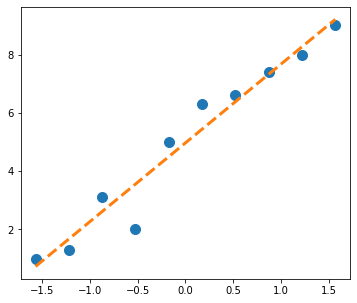

In [114]:
print('Final Parameters:', model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)

# model training vie the .compile() and .fit() method

In [ ]:
tf.random.set_seed(1)
model= MyModel()
model.compile(optimizer='sgd', loss= loss_fn, metrics=['mae', 'mse'])
model.fit(X_train_norm, y_train, epochs=num_epochs, batch_size= batch_size, verbose=1)

# Building a multilayer perceptron for classifying flowers in the iris dataset

In [155]:
iris, iris_info= tfds.load('iris', with_info=True)


In [156]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)
print(next(iter(ds_orig)))
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

next(iter(ds_train_orig))


{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

In [157]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', 
                          name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])

iris_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [163]:
iris_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)


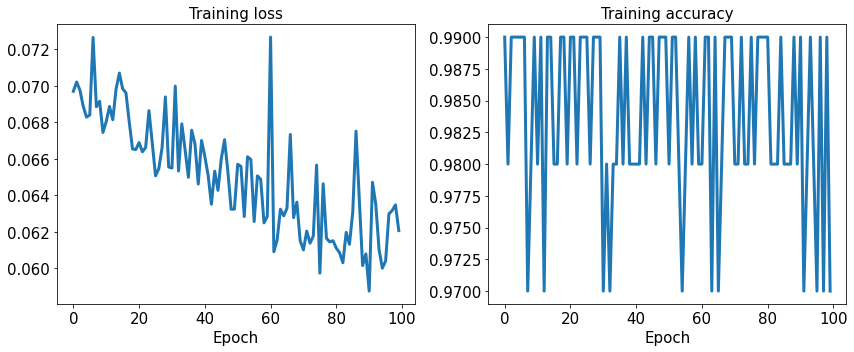

In [164]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
#plt.savefig('ch13-cls-learning-curve.pdf')

plt.show()


In [165]:
result= iris_model.evaluate(ds_test.batch(50), verbose=0)
result

[0.054904427379369736, 0.9800000190734863]

In [166]:
iris_model.save('iris-classifier.h5', overwrite=True, include_optimizer=True, save_format='h5')

In [167]:
iris_model_new= tf.keras.models.load_model('iris-classifier.h5')
iris_model_new.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [168]:
result= iris_model.evaluate(ds_test.batch(33), verbose=0)
result

[0.054904431104660034, 0.9800000190734863]

#Chossing activation function for multilayer neural networks

In [169]:
import numpy as np
X= np.array([1,1.4,2.5])
w= np.array([0.4,0.3,0.5])
def net_input(X,w):
  return np.dot(X,w)
def logistic(z):
  return 1.0/(1.0+ np.exp(-z))
def logistic_activation(X,w):
  z=net_input(X,w)
  return logistic(z)
logistic_activation(X,w)

0.8879529614430097

In [174]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : data array with shape = (n_hidden_units + 1, n_samples)
# note that the first column of this array must be 1

A = np.array([[1, 0.1, 0.4, 0.6]])

z=np.dot(W,A[0].T)
a=logistic(z)

In [176]:
label=np.argmax(z,axis=0)

In [177]:
label

0

#Estimating class probabilities in multiclass classification vie the softmax function


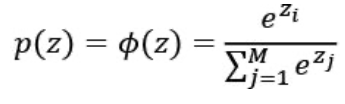

In [178]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])
A = np.array([[1, 0.1, 0.4, 0.6]])
z=np.dot(W,A[0].T)

In [179]:
def softmax(z):
  return np.exp(z)/np.sum(np.exp(z))
softmax(z)

array([0.44668973, 0.16107406, 0.39223621])

In [180]:
import tensorflow as tf
Z_tensor= tf.expand_dims(z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

# Broadening the output spectrum using a hyperbolic tangent

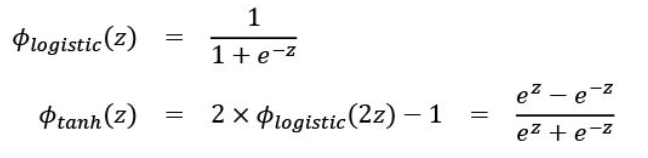

rescaled version of the logistic function

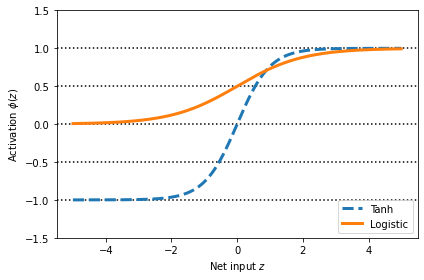

In [182]:
import matplotlib.pyplot as plt
def tanh(z):
  e1=np.exp(z)
  e2=np.exp(-z)
  return (e1-e2)/(e1+e2)
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')
plt.plot(z, tanh_act,
    linewidth=3, linestyle='--',
    label='Tanh')
plt.plot(z, log_act,
    linewidth=3,
    label='Logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


# Rectified linear unit activation(ReLU)


This means that the derivative of activation with respect to the net input diminished (not change ~0) is z become large

Relu: derivative of Relu w.r.t z, is always 1 for postive input value

In [184]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

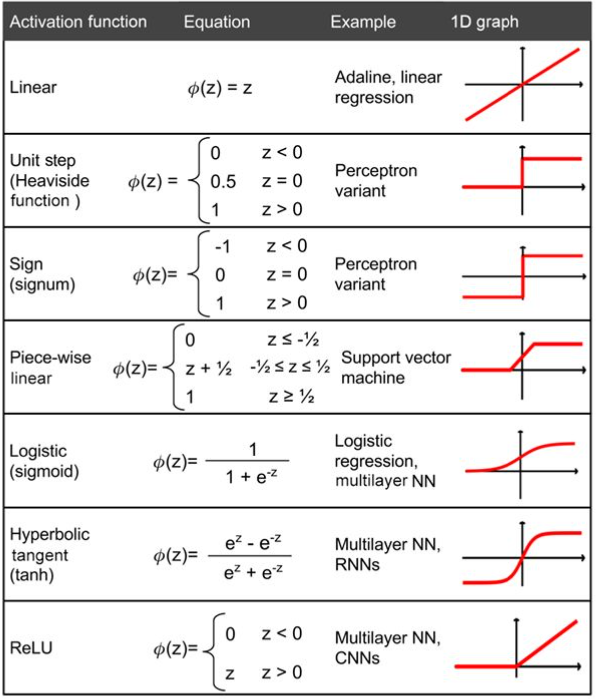